In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Titanic dataset
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Data Cleaning:**

In [3]:
# Data Cleaning: Handle missing values
print("\033[1;4mHandling missing values:\033[0m\n")
print(data.isnull().sum())

Handling missing values:

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [4]:
# Handling missing values: Replace missing 'age' values with median age
median_age = data['age'].median()
data['age'].fillna(median_age, inplace=True)

In [5]:
# Handling missing values in 'embarked' column by filling with mode (most frequent value)
mode_embarked = data['embarked'].mode()[0]
data['embarked'].fillna(mode_embarked, inplace=True)

In [6]:
# Dropping the 'deck' column due to a large proportion of missing values
data.drop(columns=['deck'], inplace=True)

In [7]:
# Handling missing values in 'embark_town' column by filling with mode (most frequent value)
mode_embark_town = data['embark_town'].mode()[0]
data['embark_town'].fillna(mode_embark_town, inplace=True)

In [8]:
# Verify if there are any remaining missing values
print("\033[1;4mRemaining missing values:\033[0m")
print(data.isnull().sum())

Remaining missing values:

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


**Data Exploration:**

In [9]:
# Display basic information about the dataset
print("\033[1;4mBasic information about the Titanic dataset:\033[0m\n")
print(data.info())

Basic information about the Titanic dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB
None


In [10]:
# Display summary statistics
print("\033[1;4mSummary statistics of the Titanic dataset:\033[0m\n")
data.describe()

Summary statistics of the Titanic dataset:



,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Feature Engineering:**

In [11]:
# Create new feature 'family_size' by combining 'sibsp' and 'parch'
data['family_size'] = data['sibsp'] + data['parch'] + 1  # Adding 1 for the passenger itself

# Map titles to 'male' and 'female' categories
title_mapping = {'male': 'Mr', 'female': 'Ms'}
data['title'] = data['sex'].map(title_mapping)

# Categorize 'age' into age groups
age_bins = [0, 18, 35, 60, np.inf]
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Categorize 'fare' into fare groups
fare_bins = [-np.inf, 10, 50, 100, np.inf]
fare_labels = ['Low', 'Medium', 'High', 'Very High']
data['fare_group'] = pd.cut(data['fare'], bins=fare_bins, labels=fare_labels, right=False)

# Encode 'sex' feature
data['sex'] = data['sex'].map({'male': 0, 'female': 1})

# Encode 'embarked' feature
data['embarked'] = data['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Categorize 'family_size' into groups
data['family_size_group'] = pd.cut(data['family_size'], bins=[0, 1, 4, np.inf], labels=['Alone', 'Small', 'Large'], right=False)

In [12]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size,title,age_group,fare_group,family_size_group
0,0,3,0,22.0,1,0,7.2500,2,Third,man,True,Southampton,no,False,2,Mr,Young Adult,Low,Small
1,1,1,1,38.0,1,0,71.2833,0,First,woman,False,Cherbourg,yes,False,2,Ms,Adult,High,Small
2,1,3,1,26.0,0,0,7.9250,2,Third,woman,False,Southampton,yes,True,1,Ms,Young Adult,Low,Small
3,1,1,1,35.0,1,0,53.1000,2,First,woman,False,Southampton,yes,False,2,Ms,Adult,High,Small
4,0,3,0,35.0,0,0,8.0500,2,Third,man,True,Southampton,no,True,1,Mr,Adult,Low,Small


**Hypothesis Testing:**

In [13]:
from scipy.stats import chi2_contingency, f_oneway

In [14]:
# Survival Rate by Passenger Class
contingency_table_class = pd.crosstab(data['survived'], data['pclass'])
chi2_class, p_value_class, _, _ = chi2_contingency(contingency_table_class)
print("\033[1;4mSurvival Rate by Passenger Class:\033[0m")
print("\033[1;3mChi-square statistic:\033[0m", chi2_class)
print("\033[1;3mP-value:\033[0m", p_value_class)

Survival Rate by Passenger Class:
Chi-square statistic: 102.88898875696056
P-value: 4.549251711298793e-23


In [15]:
# Survival Rate by Gender
contingency_table_gender = pd.crosstab(data['survived'], data['sex'])
chi2_gender, p_value_gender, _, _ = chi2_contingency(contingency_table_gender)
print("\033[1;4mSurvival Rate by Gender:\033[0m")
print("\033[1;3mChi-square statistic:\033[0m", chi2_gender)
print("\033[1;3mP-value:\033[0m", p_value_gender)

Survival Rate by Gender:
Chi-square statistic: 260.71702016732104
P-value: 1.1973570627755645e-58


In [16]:
# Survival Rate by Age Group
grouped_age = [data[data['age_group'] == group]['survived'] for group in age_labels]
f_statistic_age, p_value_age = f_oneway(*grouped_age)
print("\033[1;4mSurvival Rate by Age Group:\033[0m")
print("\033[1;3mF-statistic:\033[0m", f_statistic_age)
print("\033[1;3mP-value:\033[0m", p_value_age)

Survival Rate by Age Group:
F-statistic: 5.948557152255324
P-value: 0.0005123773495687209


In [17]:
# Survival Rate by Family Size
contingency_table_family = pd.crosstab(data['survived'], data['family_size_group'])
chi2_family, p_value_family, _, _ = chi2_contingency(contingency_table_family)
print("\033[1;4mSurvival Rate by Family Size:\033[0m")
print("\033[1;3mChi-square statistic:\033[0m", chi2_family)
print("\033[1;3mP-value:\033[0m", p_value_family)

Survival Rate by Family Size:
Chi-square statistic: 0.6085726774573574
P-value: 0.43532572895966826


**Visualization:**

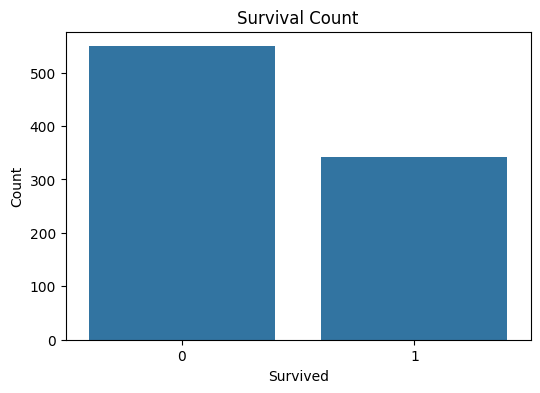

In [18]:
# Visualization 1: Explore the distribution of 'survived' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=data)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

<ipython-input-19-e24d4d259ec7>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=data, ci=None)


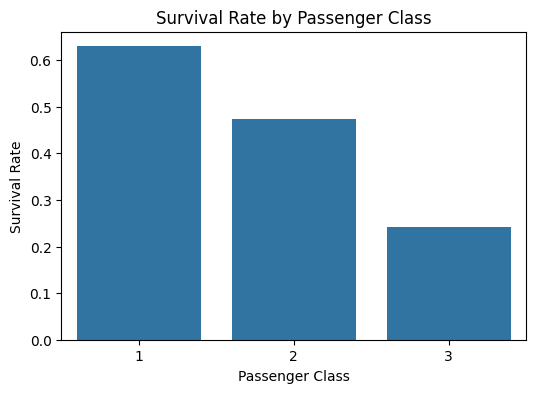

In [19]:
# Visualization 2: Survival Rate by Passenger Class
plt.figure(figsize=(6, 4))
sns.barplot(x='pclass', y='survived', data=data, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

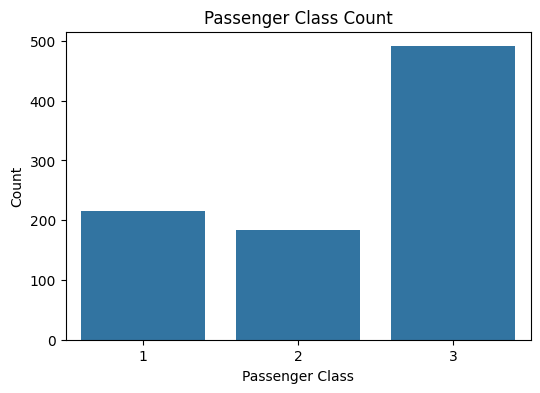

In [20]:
# Visualization 3: Explore the distribution of 'pclass' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='pclass', data=data)
plt.title('Passenger Class Count')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

<ipython-input-21-3ee67c0dd573>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='survived', data=data, ci=None)


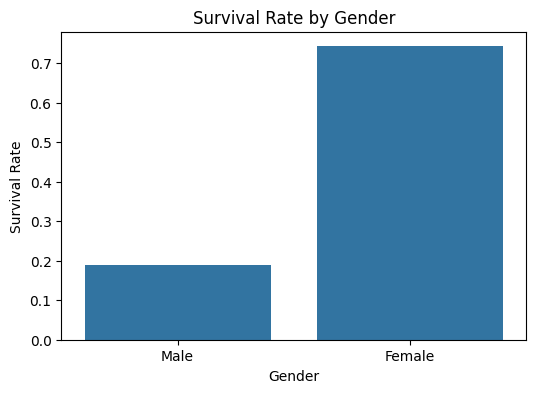

In [21]:
# Visualization 4: Survival Rate by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='survived', data=data, ci=None)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

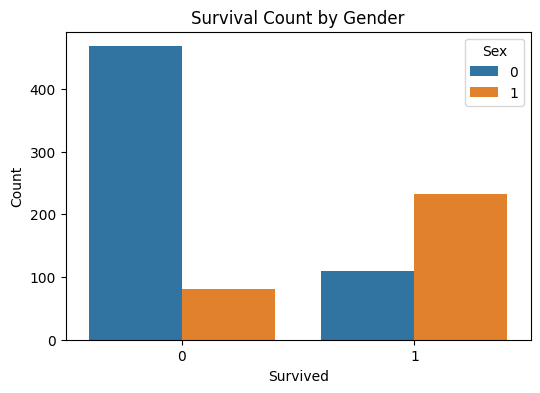

In [22]:
# Visualization 5: Explore the distribution of 'survived' variable grouped by 'sex'
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', hue='sex', data=data)
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

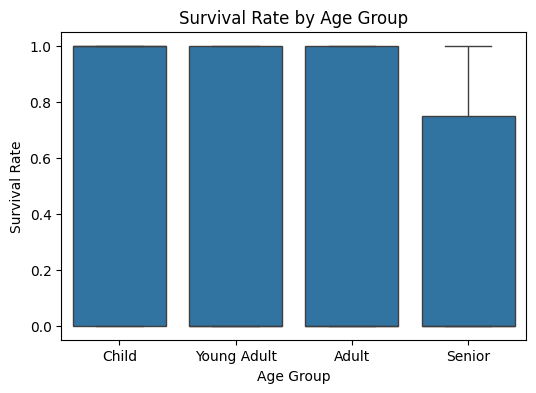

In [23]:
# Visualization 6: Survival Rate by Age Group
plt.figure(figsize=(6, 4))
sns.boxplot(x='age_group', y='survived', data=data, order=['Child', 'Young Adult', 'Adult', 'Senior'])
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

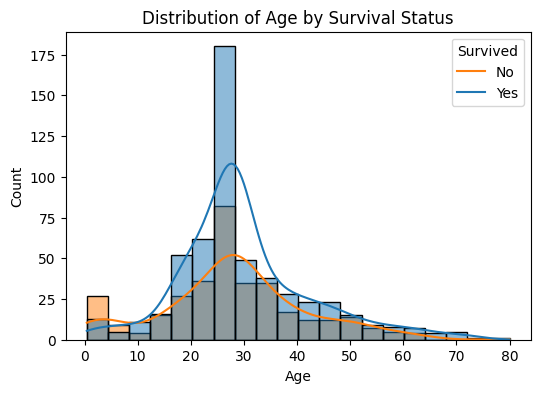

In [24]:
# Visualization 6: Explore the relationship between 'age' and 'survived' variables
plt.figure(figsize=(6, 4))
sns.histplot(x='age', hue='survived', data=data, bins=20, kde=True)
plt.title('Distribution of Age by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

<ipython-input-25-1a02e147f81a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='family_size_group', y='survived', data=data, ci=None, order=['Alone', 'Small', 'Large'])


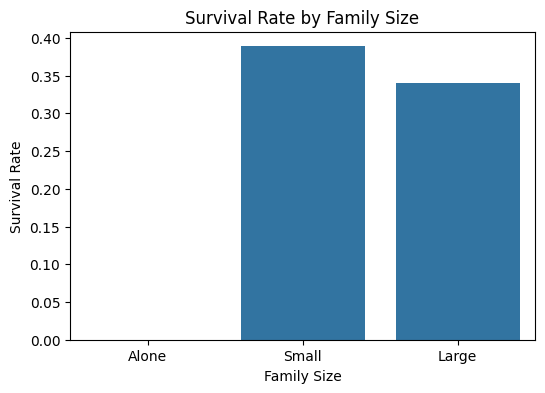

In [25]:
# Visualization 7: Survival Rate by Family Size
plt.figure(figsize=(6, 4))
sns.barplot(x='family_size_group', y='survived', data=data, ci=None, order=['Alone', 'Small', 'Large'])
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

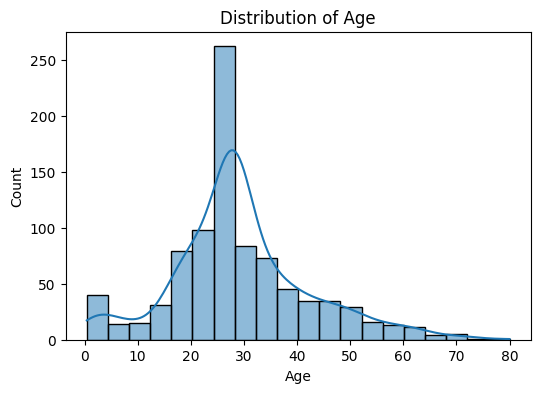

In [26]:
# Visualization 8: Explore the distribution of 'age' variable
plt.figure(figsize=(6, 4))
sns.histplot(data['age'].dropna(), bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

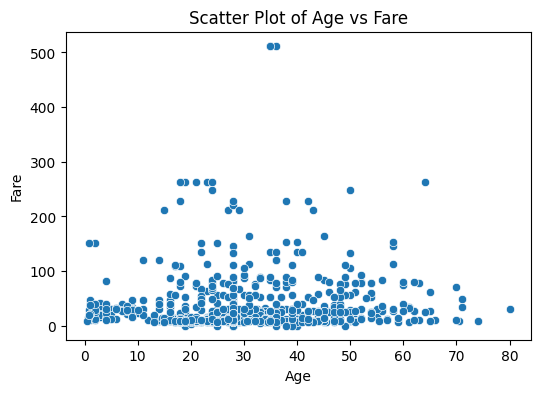

In [27]:
# Visualization 9: Explore the relationship between 'age' and 'fare' variables
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='fare', data=data)
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

<ipython-input-28-2818870677d0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})


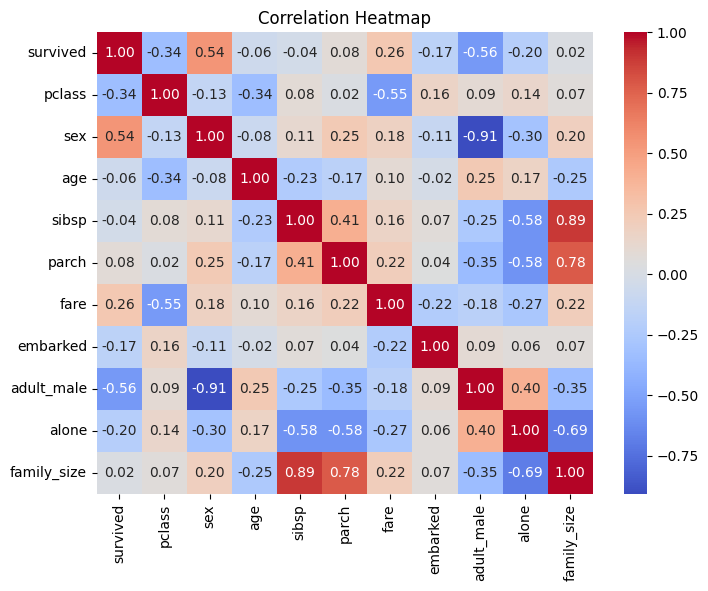

In [28]:
# Visualization 10: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()